# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
print(weather_api_key)

c0433a2c5d9b733975eece8f423fa31e


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kouango
Processing Record 4 of Set 1 | nuuk
Processing Record 5 of Set 1 | ewo
Processing Record 6 of Set 1 | maridi
Processing Record 7 of Set 1 | tulchyn
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | acarau
Processing Record 10 of Set 1 | troy
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | nakskov
Processing Record 14 of Set 1 | tokar
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | jertih
Processing Record 20 of Set 1 | hays
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | itacare
Processing Record 23 of Set 1 | enewetak
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
 
# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.23,84,100,2.41,US,1706667299
1,port-aux-francais,-49.3500,70.2167,3.95,73,88,14.22,TF,1706667299
2,kouango,4.9934,19.9619,25.87,38,100,0.42,CF,1706667299
3,nuuk,64.1835,-51.7216,-9.66,62,100,12.07,GL,1706667000
4,ewo,-0.8725,14.8206,25.60,57,100,1.11,CG,1706667299


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/djgoo/DataAnalysis/python-api-challenge/output_data/citiesdata.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/djgoo/DataAnalysis/python-api-challenge/output_data/citiesdata.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.23,84,100,2.41,US,1706667299
1,port-aux-francais,-49.3500,70.2167,3.95,73,88,14.22,TF,1706667299
2,kouango,4.9934,19.9619,25.87,38,100,0.42,CF,1706667299
3,nuuk,64.1835,-51.7216,-9.66,62,100,12.07,GL,1706667000
4,ewo,-0.8725,14.8206,25.60,57,100,1.11,CG,1706667299


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

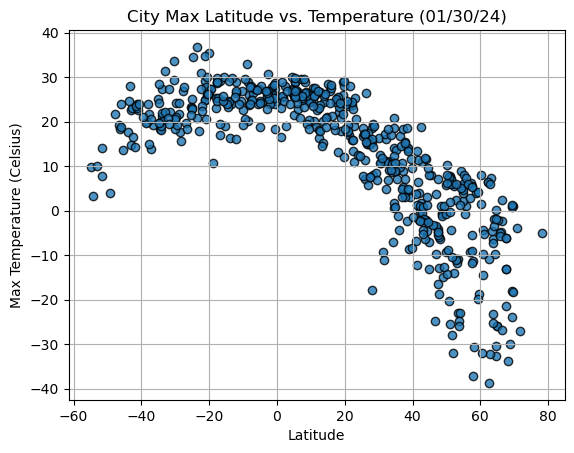

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid(True)
# Save the figure
plt.savefig("C:/Users/djgoo/DataAnalysis/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

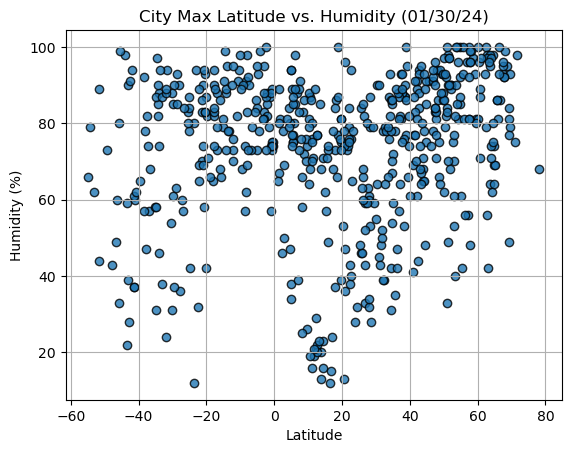

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("C:/Users/djgoo/DataAnalysis/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

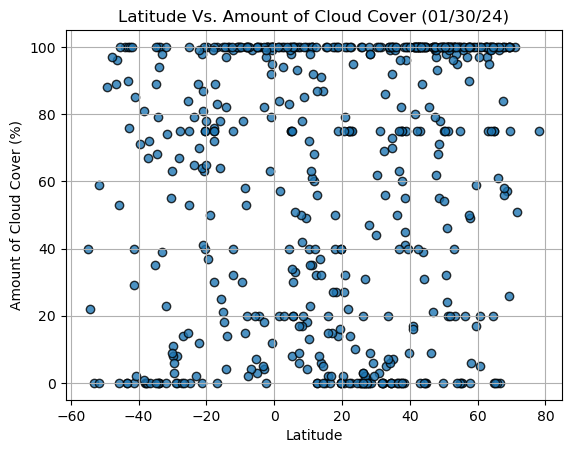

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
plt.title(("Latitude Vs. Amount of Cloud Cover (%s)") % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Amount of Cloud Cover (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/djgoo/DataAnalysis/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

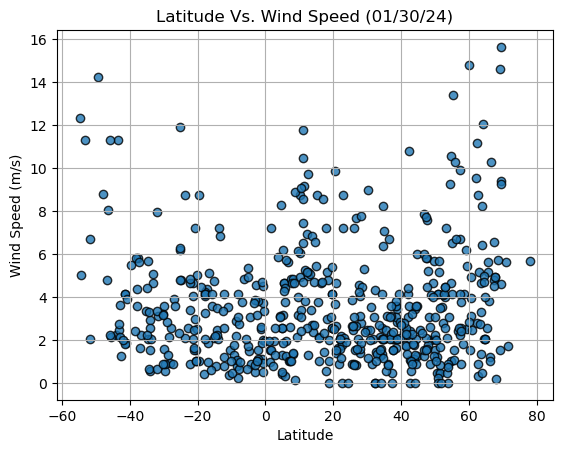

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(    
   city_data_df["Lat"],
   city_data_df["Wind Speed"],
   edgecolor="black",
   linewidths=1,
   marker="o",
   alpha=0.8,
   label="Cities"
)
# Incorporate the other graph properties
plt.title(("Latitude Vs. Wind Speed (%s)") % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("C:/Users/djgoo/DataAnalysis/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,title,text_coordinates):
    
    # Linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot scatter and regresion
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r^2-value is: {rvalue}")

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.23,84,100,2.41,US,1706667299
2,kouango,4.9934,19.9619,25.87,38,100,0.42,CF,1706667299
3,nuuk,64.1835,-51.7216,-9.66,62,100,12.07,GL,1706667000
5,maridi,4.9158,29.4742,21.42,34,98,1.28,SS,1706667300
6,tulchyn,48.6745,28.8464,-0.50,66,55,2.61,UA,1706667300


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.95,73,88,14.22,TF,1706667299
4,ewo,-0.8725,14.8206,25.60,57,100,1.11,CG,1706667299
7,edinburgh of the seven seas,-37.0676,-12.3116,13.91,57,72,1.61,SH,1706667300
8,acarau,-2.8856,-40.1200,26.73,83,4,4.56,BR,1706667300
10,saint-pierre,-21.3393,55.4781,24.82,83,0,2.06,RE,1706667300


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.8251407961255128


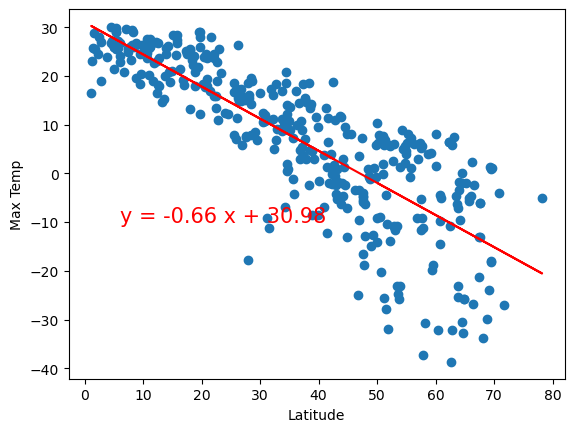

In [60]:
# Linear regression on Northern Hemisphere
xvalues = northern_hemi_df ["Lat"]
yvalues = northern_hemi_df ["Max Temp"]
linear_regression(xvalues, yvalues, "Max Temp", (6,-10))

The r^2-value is: 0.5065891458618629


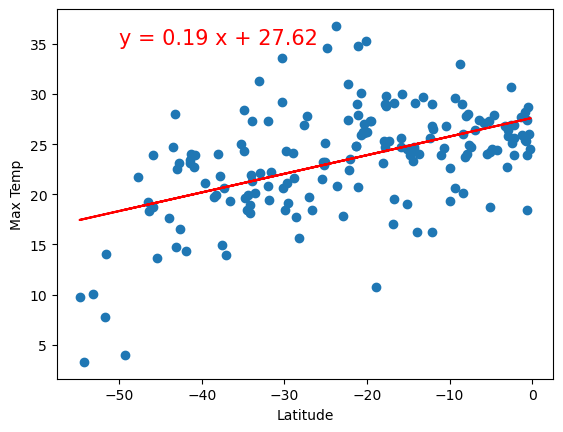

In [61]:
# Linear regression on Southern Hemisphere
xvalues = southern_hemi_df ["Lat"]
yvalues = southern_hemi_df ["Max Temp"]
linear_regression(xvalues, yvalues, "Max Temp", (-50,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.3626216288206017


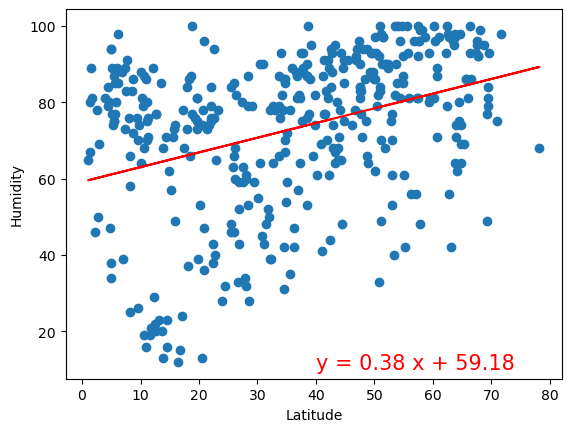

In [62]:
# Northern Hemisphere
xvalues = northern_hemi_df ["Lat"]
yvalues = northern_hemi_df ["Humidity"]
linear_regression(xvalues, yvalues, "Humidity", (40,10))

The r^2-value is: 0.3592356834232101


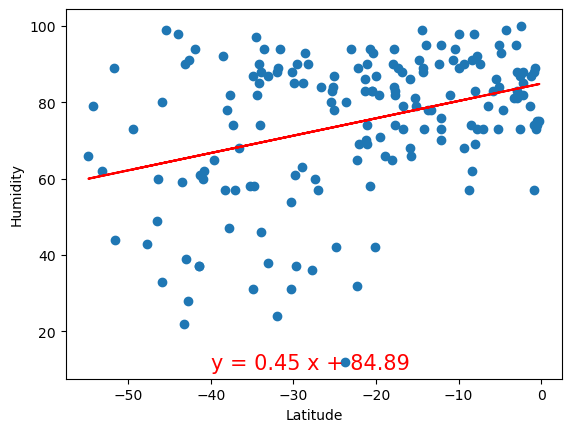

In [63]:
# Southern Hemisphere
xvalues = southern_hemi_df ["Lat"]
yvalues = southern_hemi_df ["Humidity"]
linear_regression(xvalues, yvalues, "Humidity", (-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.23607021363179664


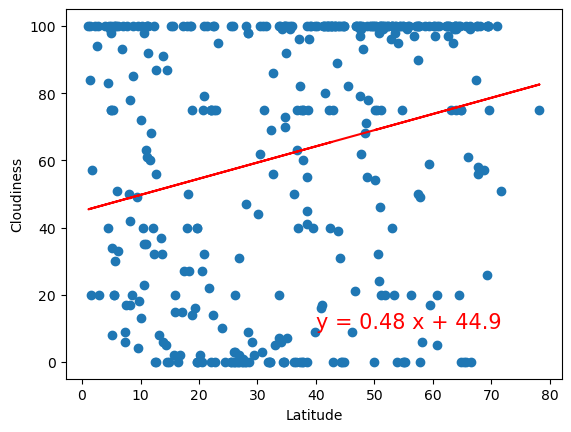

In [64]:
# Northern Hemisphere
xvalues = northern_hemi_df ["Lat"]
yvalues = northern_hemi_df ["Cloudiness"]
linear_regression(xvalues, yvalues, "Cloudiness", (40,10))

The r^2-value is: 0.2427323629292938


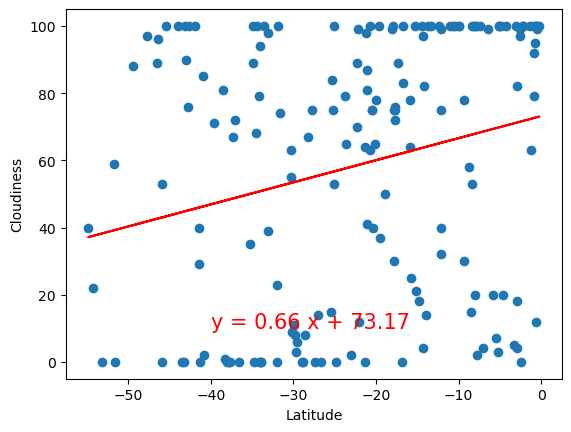

In [65]:
# Southern Hemisphere
xvalues = southern_hemi_df ["Lat"]
yvalues = southern_hemi_df ["Cloudiness"]
linear_regression(xvalues, yvalues, "Cloudiness", (-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.07884945662037966


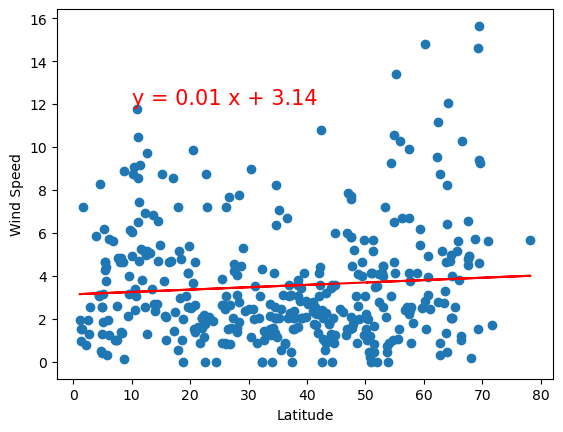

In [66]:
# Northern Hemisphere
xvalues = northern_hemi_df ["Lat"]
yvalues = northern_hemi_df ["Wind Speed"]
linear_regression(xvalues, yvalues, "Wind Speed", (10,12))

The r^2-value is: -0.3696174640521588


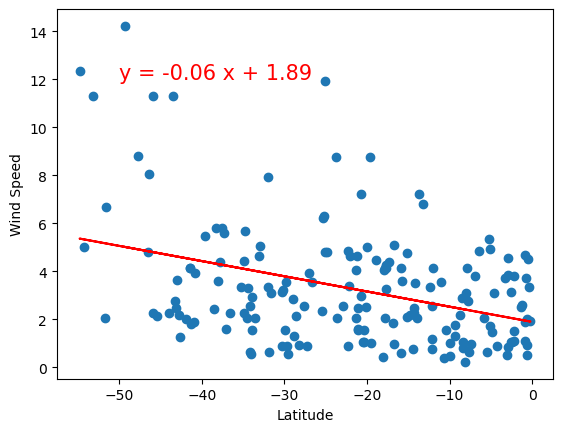

In [67]:
# Southern Hemisphere
xvalues = southern_hemi_df ["Lat"]
yvalues = southern_hemi_df ["Wind Speed"]
linear_regression(xvalues, yvalues, "Wind Speed", (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE